<a href="https://colab.research.google.com/github/Debasmita777/tutorial/blob/main/Cats_%26_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:11<00:00, 177MB/s]
100% 1.06G/1.06G [00:11<00:00, 99.9MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.


In [ ]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 5000 files belonging to 2 classes.


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label



In [ ]:
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))





In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 1.3420 - accuracy: 0.6072 - val_loss: 0.5743 - val_accuracy: 0.7110
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5521 - accuracy: 0.7276 - val_loss: 0.7733 - val_accuracy: 0.6226
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4731 - accuracy: 0.7781 - val_loss: 0.5189 - val_accuracy: 0.7528
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4038 - accuracy: 0.8166 - val_loss: 0.4958 - val_accuracy: 0.7598
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3520 - accuracy: 0.8431 - val_loss: 0.4762 - val_accuracy: 0.7826
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2887 - accuracy: 0.8753 - val_loss: 0.5304 - val_accuracy: 0.7786
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2214 - accuracy: 0.9087 - val_loss: 0.6399 - val_ac

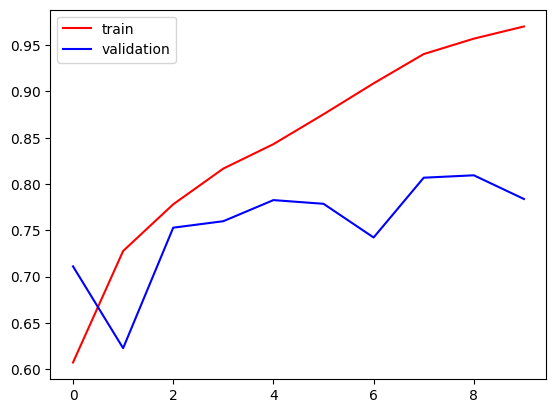

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

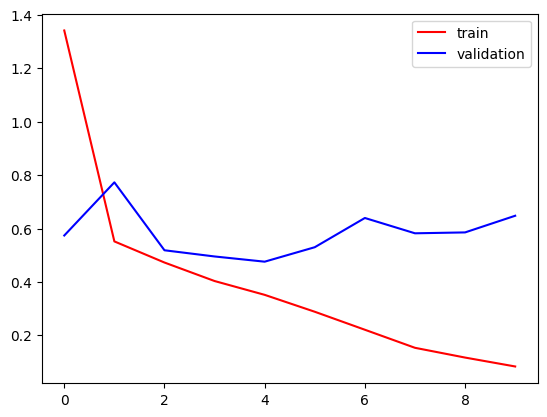

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread("/content/cat2.jpg")

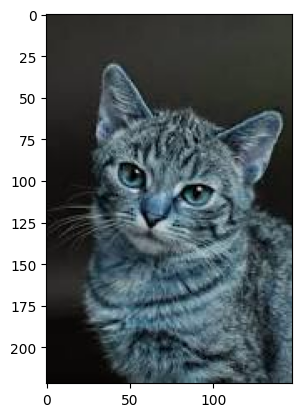

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(222, 148, 3)

In [ ]:
test_image=cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 501ms/step


array([[0.]], dtype=float32)